In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [178]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [179]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)', '投標最後一天平均成交價',
       '撥券日開盤價'],
      dtype='object')

In [180]:
df.shape

(210, 24)

In [181]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

聯廣       2
精測       2
泰昇-KY    2
奈米醫材     1
東哥遊艇     1
        ..
達亞       1
明達醫      1
冠西電三     1
必應       1
元翎       1
Name: 證券名稱, Length: 207, dtype: int64

In [182]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330,1250.0
185,2016/3/10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [183]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,重複,114.5
209,2017/1/3,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [184]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,重複,114.5


In [185]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018/1/8,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [186]:
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標) 

In [187]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)

In [188]:
df.shape

(199, 24)

In [189]:
df[df['得標總金額(元)'] == '0']['證券名稱']

Series([], Name: 證券名稱, dtype: object)

* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [190]:
df_1 = df[['證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)']]
df_1.set_index('證券代號', inplace = True)
df_1.head()

,證券名稱,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
證券代號,,,,,,,,,,,
3138,耀登科技,集中交易市場,初上市,美國標,"3,740",42.59,1,400,4.8,80.84,68.6
6752,叡揚資訊,櫃檯買賣,初上櫃,美國標,"1,800",50,1,400,4.0,67.49,58.51
26364,台驊四,櫃檯買賣,無擔保轉換公司債,美國標,"2,550",102,1,400,0.5,NaN,104.2
6727,亞泰金屬,櫃檯買賣,初上櫃,美國標,"2,005",48,1,400,5.0,68.97,62.4
1342,八貫,集中交易市場,初上市,美國標,"4,234",50,1,400,4.5,76.48,63.6


In [191]:
df_1.shape

(199, 11)

In [192]:
df_1['發行性質'].value_counts()

初上櫃         90
初上市         57
第一上市初上市     20
無擔保轉換公司債    18
有擔保轉換公司債     8
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [193]:
mask_cb = df_1['發行性質'].isin(['有擔保轉換公司債', '無擔保轉換公司債'])
sum(mask_cb)

26

In [194]:
mask_stock = -mask_cb
sum(mask_stock)

173

In [195]:
df1_stock = df_1[mask_stock]
df1_cb = df_1[mask_cb]

* 股票 173筆
* 可轉債 26筆

## 檢查缺失值 把股票和可轉債分開看


In [196]:
df1_stock.isnull().apply(lambda x: sum(x))

證券名稱              0
發行市場              0
發行性質              0
競拍方式              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      24
最低得標價格(元)         0
dtype: int64

In [197]:
df1_cb.isnull().apply(lambda x: sum(x))

證券名稱              0
發行市場              0
發行性質              0
競拍方式              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      26
最低得標價格(元)         0
dtype: int64

In [198]:
df1_stock.dropna(inplace = True)
df1_stock.shape

(149, 11)

In [199]:
df1_stock.isnull().apply(lambda x: sum(x))

證券名稱             0
發行市場             0
發行性質             0
競拍方式             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [200]:
df1_stock.dtypes

證券名稱              object
發行市場              object
發行性質              object
競拍方式              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價       object
最低得標價格(元)         object
dtype: object

In [201]:
num_col = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)']
for col in num_col:
    df1_stock[col] = df1_stock[col].apply(lambda x: x.replace(',', '')) 
    df1_stock[col] = df1_stock[col].apply(pd.to_numeric, errors = 'coerce')

df1_stock.isnull().apply(lambda x: sum(x))

證券名稱             0
發行市場             0
發行性質             0
競拍方式             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      1
最低得標價格(元)        0
dtype: int64

## 1. 最低得標相對底標漲幅(%)


In [202]:
## 將存為str 的數字改為 numeric
## type(df['最低投標價格(元)'][1])  本來是字串
df['最低投標價格(元)'] = df['最低投標價格(元)'].apply(lambda x:x.replace(',', ''))
df['最低投標價格(元)'] = pd.to_numeric(df['最低投標價格(元)'])

In [203]:
df['最低得標價格(元)'] = df['最低得標價格(元)'].apply(lambda x:x.replace(',', ''))
df['最低得標價格(元)'] = pd.to_numeric(df['最低得標價格(元)'])
type(df['最低得標價格(元)'][1])

KeyError: 1

In [402]:
## 確認資料長度一樣
df['最低得標價格(元)'].shape, df['最低投標價格(元)'].shape

((209,), (209,))

In [403]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
df.apply(lambda x: f(x['最低投標價格(元)'], x['最低得標價格(元)']), axis = 1)
df["最低得標相對底標漲幅"] = df.apply(lambda x: f(x['最低投標價格(元)'], x['最低得標價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [404]:
df['最低得標相對底標漲幅'].dropna().describe()

count    199.000000
mean      31.355929
std       22.612847
min        0.000000
25%       15.076513
50%       30.000000
75%       42.083367
max      143.520000
Name: 最低得標相對底標漲幅, dtype: float64

(array([11.,  2.,  3.,  5.,  1.,  1.,  3.,  3.,  4.,  4.,  1.,  0.,  2.,
         3.,  0.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  5.,  2.,  1.,
         2.,  2.,  3.,  2.,  2.,  3.,  0.,  3.,  3.,  6.,  6.,  5.,  3.,
         3.,  5.,  4.,  4.,  3.,  2.,  8.,  5.,  3.,  0.,  3.,  0.,  3.,
         3.,  1.,  2.,  2.,  2.,  1.,  3.,  3.,  1.,  1.,  3.,  0.,  3.,
         2.,  0.,  2.,  1.,  1.,  0.,  2.,  0.,  4.,  0.,  0.,  2.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

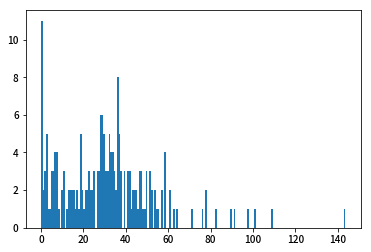

In [405]:
plt.hist(df['最低得標相對底標漲幅'].dropna(), bins = 180)

### 把可轉債跟股票分開來看看

In [406]:
df['發行性質'].value_counts()

初上櫃         92
初上市         59
第一上市初上市     22
無擔保轉換公司債    21
有擔保轉換公司債     9
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [407]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(179, 25)

In [408]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 25)

In [409]:
df_stock['最低得標相對底標漲幅'].dropna().describe()

count    173.000000
mean      35.585449
std       21.192643
min        0.000000
25%       22.917236
50%       32.711621
75%       44.697565
max      143.520000
Name: 最低得標相對底標漲幅, dtype: float64

In [410]:
df_cb['最低得標相對底標漲幅'].dropna().describe()

count    26.000000
mean      3.213356
std       3.513240
min       0.000000
25%       0.652941
50%       2.188431
75%       5.250000
max      15.200000
Name: 最低得標相對底標漲幅, dtype: float64

Text(0, 0.5, 'counts')

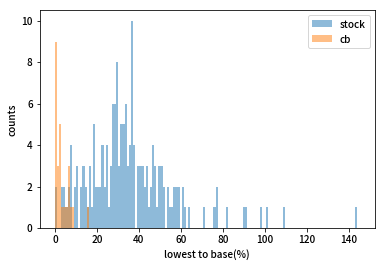

In [411]:
a = df_stock['最低得標相對底標漲幅'].dropna()
b = df_cb['最低得標相對底標漲幅'].dropna()
bins = np.linspace(0, 145, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('lowest to base(%)')
plt.ylabel('counts')

### 橫軸是 最低得標相對底標漲幅(%)

### 觀察一下那些outlier

## 2. 平均得標相對底標漲幅(%)

In [412]:
df['得標加權平均價格(元)'] = df['得標加權平均價格(元)'].apply(lambda x:x.replace(',', ''))
df['得標加權平均價格(元)'] = pd.to_numeric(df['得標加權平均價格(元)'])
type(df['得標加權平均價格(元)'][1])

numpy.float64

In [413]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
df.apply(lambda x: f(x['最低投標價格(元)'], x['得標加權平均價格(元)']), axis = 1)
df["加權得標相對底標漲幅"] = df.apply(lambda x: f(x['最低投標價格(元)'], x['得標加權平均價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [414]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(179, 26)

In [415]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 26)

In [416]:
df_stock['加權得標相對底標漲幅'].dropna().describe()

count    173.000000
mean      41.144461
std       21.628431
min        1.279856
25%       28.726287
50%       37.717949
75%       49.724192
max      149.440000
Name: 加權得標相對底標漲幅, dtype: float64

In [417]:
df_cb['加權得標相對底標漲幅'].dropna().describe()

count    26.000000
mean      5.074106
std       4.039242
min       0.910000
25%       2.165245
50%       4.330097
75%       6.760000
max      20.180000
Name: 加權得標相對底標漲幅, dtype: float64

Text(0, 0.5, 'counts')

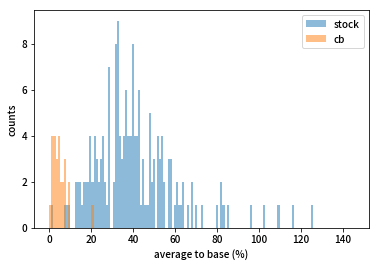

In [418]:
a = df_stock['加權得標相對底標漲幅'].dropna()
b = df_cb['加權得標相對底標漲幅'].dropna()
bins = np.linspace(0, 145, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('average to base (%)')
plt.ylabel('counts')

## 3. 加權得標相對最低得標漲幅(%)

In [419]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
## df.apply(lambda x: f(x['最低得標價格(元)'], x['得標加權平均價格(元)']), axis = 1)
df["加權得標相對最低得標漲幅"] = df.apply(lambda x: f(x['最低得標價格(元)'], x['得標加權平均價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [420]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(179, 27)

In [421]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 27)

In [422]:
df_stock['加權得標相對最低得標漲幅'].dropna().describe()

count    173.000000
mean       4.203890
std        2.837480
min        0.000000
25%        2.404181
50%        3.430233
75%        5.259631
max       14.750329
Name: 加權得標相對最低得標漲幅, dtype: float64

In [423]:
df_cb['加權得標相對最低得標漲幅'].dropna().describe()

count    26.000000
mean      1.794366
std       1.110571
min       0.854127
25%       1.077264
50%       1.382023
75%       1.931033
max       4.509881
Name: 加權得標相對最低得標漲幅, dtype: float64

Text(0, 0.5, 'counts')

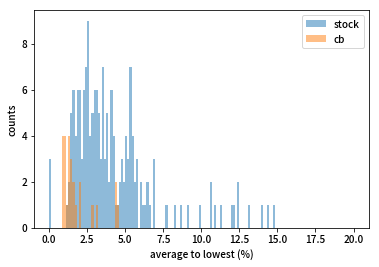

In [424]:
a = df_stock['加權得標相對最低得標漲幅'].dropna()
b = df_cb['加權得標相對最低得標漲幅'].dropna()
bins = np.linspace(0, 20, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('average to lowest (%)')
plt.ylabel('counts')

In [425]:
low2base_stock = df_stock[['開標日期','證券名稱','最低投標價格(元)','最低得標相對底標漲幅','加權得標相對底標漲幅']]
low2base_stock.sort_values(by = ['最低得標相對底標漲幅'], ascending = False).head(10)


,開標日期,證券名稱,最低投標價格(元),最低得標相對底標漲幅,加權得標相對底標漲幅
179,2017/4/5,保瑞,25.00,143.520000,149.440000
66,2019/9/2,新盛力,15.93,109.039548,116.760829
32,2020/5/26,ABC-KY,40.00,101.250000,125.525000
175,2017/4/13,三貝德,70.83,97.797543,102.414231
181,2017/2/24,晶心科,54.25,91.078341,96.589862
61,2019/10/16,安碁資訊,50.00,90.000000,108.760000
78,2019/4/9,雍智科技,65.22,82.306041,84.805274
83,2019/3/7,勤凱,18.68,77.516060,82.012848
77,2019/4/19,勤崴,106.15,77.465850,82.618935
30,2020/6/15,東典光電,57.63,76.297067,82.005900


## 4. 競拍張數占總合格投標數量(張)百分比

### 觀察是不是每次除了流標都全額標出去

In [426]:
success_auction = df['最低得標價格(元)'] > 0 
df[success_auction].shape

(199, 27)

In [427]:
df['合格投標數量(張)'] = df['合格投標數量(張)'].apply(lambda x:x.replace(',', '') if type(x) == str else x)
df['合格投標數量(張)'] = pd.to_numeric(df['合格投標數量(張)'])
type(df['合格投標數量(張)'][1])

numpy.int64

In [428]:
df['競拍數量(張)'] = df['競拍數量(張)'].apply(lambda x:x.replace(',', '') if type(x) == str else x)
df['競拍數量(張)'] = pd.to_numeric(df['競拍數量(張)'])
type(df['競拍數量(張)'][1])

numpy.int64

### 發現有四檔沒有全數標出去

In [429]:
fully_bid = df[success_auction]['合格投標數量(張)'] - df[success_auction]['競拍數量(張)'] > 0
df[success_auction][-fully_bid]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價,最低得標相對底標漲幅,加權得標相對底標漲幅,加權得標相對最低得標漲幅
29,2020/7/31,世紀鋼四,99584,櫃檯買賣,無擔保轉換公司債,美國標,12750,100.00,1,"1,275",...,10544,100.00,110,101.13,100.00,NaN,104.9,0.0,1.130000,1.130000
31,2020/5/28,豐藝三,61893,櫃檯買賣,無擔保轉換公司債,美國標,8500,101.00,1,850,...,3740,101.00,498,103.94,101.00,NaN,104.4,0.0,2.910891,2.910891
34,2020/5/11,新唐一,49191,櫃檯買賣,無擔保轉換公司債,美國標,18000,100.00,1,"1,800",...,5361,100.00,110,100.91,100.00,NaN,97.0,0.0,0.910000,0.910000
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,美國標,1530,1267.33,1,153,...,1381,1267.33,"1,320",1283.55,1267.33,1330,1250.0,0.0,1.279856,1.279856


In [430]:
f = lambda x, y :(x/y)* 100  ## x占y漲幾%
df["競拍張數占合格張數比"] = df.apply(lambda x: f(x['競拍數量(張)'], x['合格投標數量(張)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [431]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(179, 28)

In [432]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 28)

In [433]:
df_stock['競拍張數占合格張數比'].dropna().describe()

count    173.000000
mean      27.372133
std       17.581539
min        6.554543
25%       14.797084
50%       22.144591
75%       36.192260
max      110.789283
Name: 競拍張數占合格張數比, dtype: float64

In [434]:
df_cb['競拍張數占合格張數比'].dropna().describe()

count     26.000000
mean      65.664739
std       69.072157
min       19.612367
25%       30.127498
50%       47.083431
75%       62.043840
max      335.758254
Name: 競拍張數占合格張數比, dtype: float64

### 記得把大於100的調成100

Text(0, 0.5, 'counts')

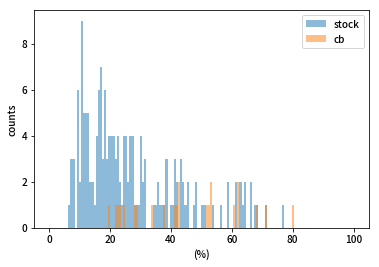

In [435]:
a = df_stock['競拍張數占合格張數比'].dropna()
b = df_cb['競拍張數占合格張數比'].dropna()
bins = np.linspace(0, 100, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('(%)')
plt.ylabel('counts')

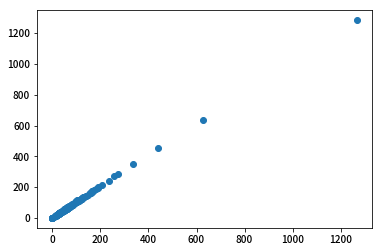

In [436]:
x_stock = df_stock['最低得標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)

##  觀察lowest2base 對 average2base 的分布

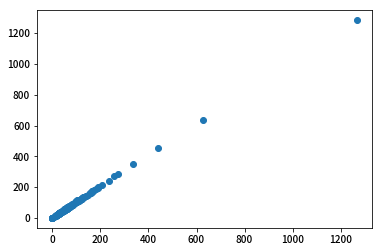

In [437]:
x_stock = df_stock['最低得標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)

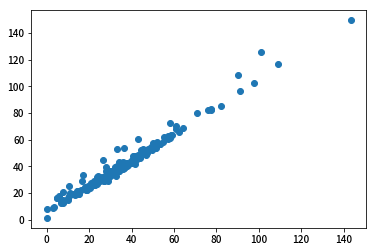

In [438]:
x_stock = df_stock['最低得標相對底標漲幅'].dropna()
y_stock = df_stock['加權得標相對底標漲幅'].dropna()
plt.scatter(x_stock, y_stock)

Text(0, 0.5, 'lowest (price)')

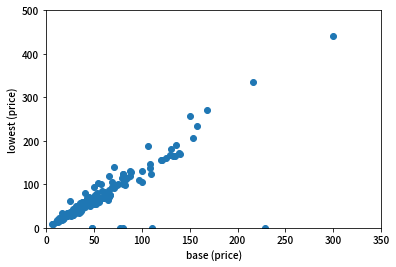

In [439]:
x_stock = df_stock['最低投標價格(元)'].dropna()
y_stock = df_stock['最低得標價格(元)'].dropna()
plt.scatter(x_stock, y_stock)
plt.xlim(0, 350)
plt.ylim(0, 500)
plt.xlabel('base (price)')
plt.ylabel('lowest (price)')

### 最低得標為零的為正在進行中的標案 配飾模型時記得drop掉

## 模型1 ： linear regression (lowest~ base)

Text(0, 0.5, 'lowest (price)')

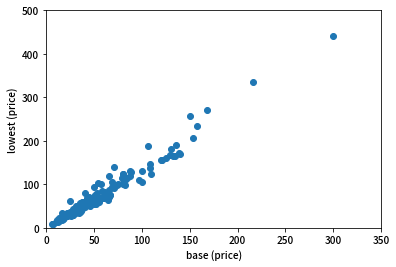

In [440]:
df1_stock = df_stock[['最低投標價格(元)','最低得標價格(元)']].dropna()
df1_stock = df1_stock[~df1_stock['最低得標價格(元)'].isin([0])]   ## 把最低得標價格為0的列刪除 ~為相反的意思
x_stock = df1_stock[['最低投標價格(元)']]
y_stock = df1_stock['最低得標價格(元)']
plt.scatter(x_stock, y_stock)
plt.xlim(0, 350)
plt.ylim(0, 500)
plt.xlabel('base (price)')
plt.ylabel('lowest (price)')

In [441]:
model1 = LinearRegression().fit(x_stock, y_stock)
r_sq = model1.score(x_stock, y_stock)
print('係數: ', model1.coef_[0], " 截距: ", model1.intercept_)
print('coefficient of determination:', r_sq)

係數:  1.0895675964438687  截距:  14.881205106827622
coefficient of determination: 0.9570964149981822


Text(0, 0.5, 'average (price)')

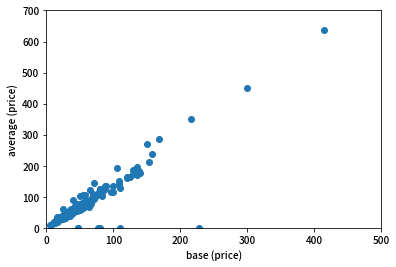

In [442]:
x_stock = df_stock['最低投標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)
plt.xlim(0, 500)
plt.ylim(0, 700)
plt.xlabel('base (price)')
plt.ylabel('average (price)')

### 記得用kernal的方法把hist變平滑

### 5.觀察得標的分布是左偏還右偏
### 已知得標的最低、最高、平均